In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


In [2]:
file_path='total_new.csv' ####
df=pd.read_csv(file_path)
df["Metadata_gene"]=df["Metadata_gene"].fillna('empty')


dfp=df[df['Metadata_control_type']=='negcon']
df=df[df['Metadata_control_type']!='negcon']
df=df[df['Metadata_gene']!='empty']
df=df[df["Metadata_experiment_type"]!='ORF']
# sampling
dd=(df['Metadata_gene'].value_counts())
dd1=dd.index.tolist()

import random
random.seed(1)
aa1=random.sample(dd1, 128)#####

z = []
for m in dd1:
    if m not in aa1:
        z.append(m)
dfcom=df[df['Metadata_experiment_type']=='Compound']
dfcom=dfcom[~dfcom['Metadata_pert_type'].isin(['control'])]

dftr1=dfcom[dfcom['Metadata_gene'].isin(aa1)]

dftr2=df[df['Metadata_experiment_type']=='CRISPR']
dftr2=dftr2[~dftr2['Metadata_pert_type'].isin(['control'])]

##### Only is list of plate is for mAP classifiation, so we filter it out
lst=['BR00116991','BR00116992','BR00116993','BR00116994','BR00117015','BR00117016','BR00117017','BR00117019','BR00116995','BR00117024','BR00117025','BR00117026','BR00117010','BR00117011','BR00117012','BR00117013']
dc=pd.DataFrame()
for i in lst:
    dc=pd.concat([dc,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
dc0=pd.DataFrame()
for i in ['BR00116991','BR00116992','BR00116993','BR00116994']:
    dc0=pd.concat([dc0,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
    
dc1=pd.DataFrame()
for i in ['BR00117015','BR00117016','BR00117017','BR00117019']:
    dc1=pd.concat([dc1,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
    
dc2=pd.DataFrame()
for i in ['BR00116995','BR00117024','BR00117025','BR00117026']:
    dc2=pd.concat([dc2,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
    
dc3=pd.DataFrame()
for i in ['BR00117010','BR00117011','BR00117012','BR00117013']:
    dc3=pd.concat([dc3,dftr1.loc[dftr1['Metadata_Plate']==i,:]])  
import random
teadd=pd.DataFrame()
for i in aa1:
    dc00=dc0.loc[dc0['Metadata_gene']==i,:]
    dc11=dc1.loc[dc1['Metadata_gene']==i,:]
    dc22=dc2.loc[dc2['Metadata_gene']==i,:]
    dc33=dc3.loc[dc3['Metadata_gene']==i,:]
    if len(dc00['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc00['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc00[dc00['Metadata_pert_iname']==ge]])
   # else:
   #     print('else',len(dc00))
   #     print(dc00['Metadata_gene'].unique())
   #     print(dc00['Metadata_pert_iname'].unique())

    if len(dc11['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc11['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc11[dc11['Metadata_pert_iname']==ge]])
    #else:
    #    print('else',len(dc11))
    #    print(dc11['Metadata_gene'].unique())
    #    print(dc11['Metadata_pert_iname'].unique())
        
    if len(dc22['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc22['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc22[dc22['Metadata_pert_iname']==ge]])
    #else:
    #    print('else',len(dc22))
    #    print(dc22['Metadata_gene'].unique())
    #    print(dc22['Metadata_pert_iname'].unique())
        
    if len(dc33['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc33['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc33[dc33['Metadata_pert_iname']==ge]])
    #else:
        #print('else',len(dc33))
        #print(dc33['Metadata_gene'].unique())
        #print(dc33['Metadata_pert_iname'].unique())
drolist=list(teadd['Unnamed: 0'].index)
dc1=dc.drop(index=drolist)
dfte1=teadd
dft=pd.concat([dc1,dftr2]) ###训练

/tmp/ipykernel_2288409/1291667439.py:2: DtypeWarning: Columns (2,6,7,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


In [3]:
dfte2=df[df['Metadata_gene'].isin(z)]
#dfte2=pd.concat([dfte2,dftr2])
dfte2=dfte2.drop_duplicates()
dfte2=dfte2[dfte2['Metadata_experiment_type']=='Compound']
#### SEEN
y_train=dft['Metadata_gene']
trainX=dft.drop('Metadata_gene', axis = 1)
dfte11=dfte1[dfte1['Metadata_gene']!='empty']
y_test=dfte11[dfte11['Metadata_experiment_type']=='Compound']['Metadata_gene']
testX=dfte11[dfte11['Metadata_experiment_type']=='Compound'].drop('Metadata_gene', axis = 1)
trainX=trainX.iloc[:,trainX.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
testX=testX.iloc[:,testX.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
trainX_final=trainX
testX_final=testX
trainY_final=y_train
testY_final=y_test
trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(y_train)
testY=np.array(y_test)

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
mlp_clf = MLPClassifier(hidden_layer_sizes=(1280,630,300,178),
                        max_iter = 300,activation = 'relu',verbose=True, tol=1e-8,
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

Iteration 1, loss = 4.65107672
Iteration 2, loss = 3.87449722
Iteration 3, loss = 3.25495954
Iteration 4, loss = 2.74104715
Iteration 5, loss = 2.29073795
Iteration 6, loss = 1.85618004
Iteration 7, loss = 1.43694203
Iteration 8, loss = 1.14123374
Iteration 9, loss = 0.88004623
Iteration 10, loss = 0.65484505
Iteration 11, loss = 0.53334671
Iteration 12, loss = 0.40775737
Iteration 13, loss = 0.28187208
Iteration 14, loss = 0.21830094
Iteration 15, loss = 0.10756434
Iteration 16, loss = 0.06988346
Iteration 17, loss = 0.05276283
Iteration 18, loss = 0.04429739
Iteration 19, loss = 0.03456549
Iteration 20, loss = 0.02357915
Iteration 21, loss = 0.02629881
Iteration 22, loss = 0.04395636
Iteration 23, loss = 0.04302837
Iteration 24, loss = 0.06519435
Iteration 25, loss = 0.19945463
Iteration 26, loss = 0.29529470
Iteration 27, loss = 0.38314510
Iteration 28, loss = 0.27266709
Iteration 29, loss = 0.15540792
Iteration 30, loss = 0.09082265
Iteration 31, loss = 0.06337146
Training loss did

MLPClassifier(hidden_layer_sizes=(1280, 630, 300, 178), max_iter=300, tol=1e-08,
              verbose=True)

These below are MLP Classification

In [5]:
sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)
y_pred = mlp_clf.predict(testX_scaled)
print('Seen')
print(classification_report(testY, y_pred))

Seen
              precision    recall  f1-score   support

         ADA       0.44      0.25      0.32        16
       ADH1C       0.12      0.25      0.16        16
     ADORA2A       0.00      0.00      0.00        16
      ADRA2B       0.14      0.12      0.13        16
        AGER       0.38      0.40      0.39        15
      AKR1B1       0.06      0.06      0.06        16
      AKR1C1       0.21      0.20      0.21        15
       ALDH2       0.25      0.06      0.10        16
         ALK       0.50      0.50      0.50        16
       ANXA1       0.00      0.00      0.00         0
       ASIC1       0.00      0.00      0.00        16
         ATM       0.40      0.50      0.44        16
     ATP5F1D       0.09      0.06      0.07        16
      AVPR1A       0.30      0.19      0.23        16
         BAX       0.00      0.00      0.00         0
         BTK       0.00      0.00      0.00         0
        CA14       0.20      0.12      0.15        16
        CA5A       0.4

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
####SEEN
report=classification_report(testY, y_pred,output_dict=True)
df1=pd.DataFrame(report).transpose()[['precision']]
df1.rename(columns={'precision': 'Precision'},inplace=True)
df1.drop(['micro avg','macro avg','weighted avg'],axis=0,errors='ignore',inplace = True)
df1.index.name='Label'
df1=df1[df1.index.isin(pd.Series(testY).unique())]

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
#### UNSEEN
dfte22=dfte2[dfte2['Metadata_gene']!='empty']
y_test=dfte22[dfte22['Metadata_experiment_type']=='Compound']['Metadata_gene']
testX=dfte22[dfte22['Metadata_experiment_type']=='Compound'].drop('Metadata_gene', axis = 1)
testX=testX.iloc[:,testX.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
testX_final=testX
testY_final=y_test
testX=np.array(testX)
testY=np.array(y_test)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaler = sc.fit(trainX)
testX_scaled = scaler.transform(testX)

In [8]:
y_pred = mlp_clf.predict(testX_scaled)

print('Unseen Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print(classification_report(testY, y_pred))

Unseen Accuracy: 0.00
              precision    recall  f1-score   support

        ABL1       0.00      0.00      0.00        48
         ADA       0.00      0.00      0.00         0
       ADH1C       0.00      0.00      0.00         0
     ADORA2A       0.00      0.00      0.00         0
      ADRA2B       0.00      0.00      0.00         0
        AGER       0.00      0.00      0.00         0
      AKR1B1       0.00      0.00      0.00         0
      AKR1C1       0.00      0.00      0.00         0
        AKT1       0.00      0.00      0.00        47
         ALK       0.00      0.00      0.00         0
       ANXA1       0.00      0.00      0.00         0
       ASIC1       0.00      0.00      0.00         0
         ATM       0.00      0.00      0.00         0
     ATP5F1D       0.00      0.00      0.00         0
       AURKB       0.00      0.00      0.00        48
      AVPR1A       0.00      0.00      0.00         0
         BAX       0.14      0.02      0.04        47
     

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [9]:
report2=classification_report(testY, y_pred,output_dict=True)
df2=pd.DataFrame(report2).transpose()[['precision']]
df2.rename(columns={'precision': 'Precision'},inplace=True)
df2.drop(['micro avg','macro avg','weighted avg'],axis=0,errors='ignore',inplace = True)
df2.index.name='Label'
df2=df2[df2.index.isin(pd.Series(testY).unique())]
df1['If_seen']='seen'
df2['If_seen']='unseen'

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [10]:
df3=pd.concat([df1,df2])
df3=df3.dropna()
print('AVG Seen ACC',df1['Precision'].mean())
print('AVG Unseen ACC',df2['Precision'].mean())
print('AVG ALL ACC',df3['Precision'].mean())
df3=df3.sort_values(by='Precision', ascending = False)
df3=df3.iloc[:10,:]

AVG Seen ACC 0.21519941162675643
AVG Unseen ACC 0.03180803571428571
AVG ALL ACC 0.1707408962540362


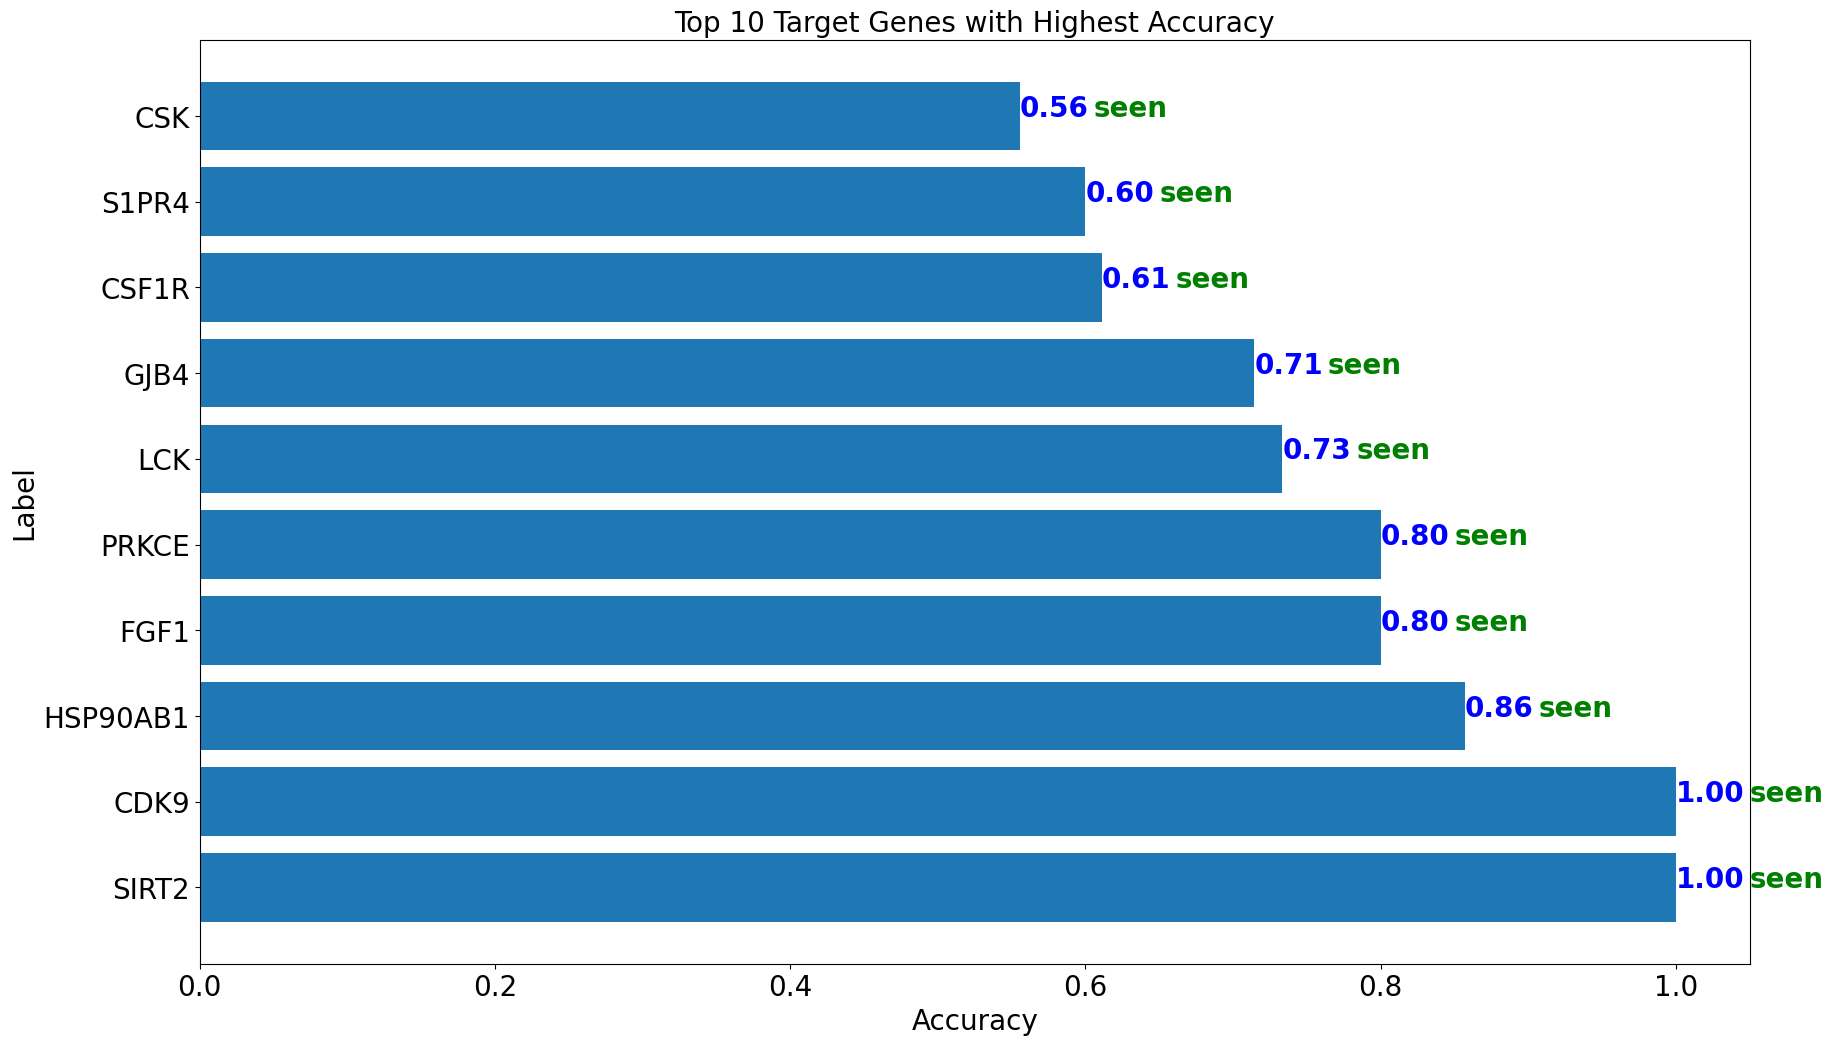

In [11]:
### TOP 10
plt.figure(figsize=(20,12))
plt.barh(df3.index,df3['Precision'])
plt.xlabel('Accuracy',fontsize=20)
plt.ylabel('Label',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Top 10 Target Genes with Highest Accuracy',fontsize=20)
for i,(v,s) in enumerate(zip(df3['Precision'],df3['If_seen'])):
    plt.text(v,i,f'{v:.2f}', color = 'blue', fontweight = 'bold',fontsize=20)
    plt.text(v+0.05, i, s, color = 'green', fontweight = 'bold',fontsize=20)
plt.show()

In [12]:
#########Feature Transformation for 1-NN Classification
import torch
import torch.nn as nn
relu = nn.ReLU(inplace=True)
ww=df
ww1=ww.iloc[:,ww.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
sc=StandardScaler()
scaler = sc.fit(ww1)
ww1_scaled = scaler.transform(ww1)
a11=np.array(relu(torch.from_numpy(np.dot(ww1_scaled,mlp_clf.coefs_[0])+mlp_clf.intercepts_[0])))
a22=np.array(relu(torch.from_numpy(np.dot(a11,mlp_clf.coefs_[1])+mlp_clf.intercepts_[1])))
a33=np.array(relu(torch.from_numpy(np.dot(a22,mlp_clf.coefs_[2])+mlp_clf.intercepts_[2])))
ww2=ww.iloc[:,0:ww.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y")]
ww_n=pd.DataFrame(a33)
ww_n.index=ww2.index

# features after MLP transformation
feature_new =pd.concat([ww2,ww_n,ww['Metadata_experiment_type']], axis=1)
df1=feature_new

In [13]:
df1=feature_new
df1=df1.iloc[:,1:-1]
df11=df1[df1['Metadata_experiment_type']=='Compound']
df11.to_csv('Compound.csv')

In [14]:
##These are used to train CCVAE
df22=df1[df1['Metadata_experiment_type']=='CRISPR']
df22.to_csv('CRISPR.csv')

In [15]:
feature_new=feature_new.reset_index()
dfte1=dfte1.reset_index()
dfte2=dfte2.reset_index()

In [16]:
dfte1=dfte1.iloc[:,2:]
dfte2=dfte2.iloc[:,2:]
feature_new=feature_new.iloc[:,2:]

In [17]:
import torch
import torch.nn as nn
relu = nn.ReLU(inplace=True)
ww=dfte1
ww1=ww.iloc[:,ww.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
sc=StandardScaler()
scaler = sc.fit(ww1)
ww1_scaled = scaler.transform(ww1)
a11=np.array(relu(torch.from_numpy(np.dot(ww1_scaled,mlp_clf.coefs_[0])+mlp_clf.intercepts_[0])))
a22=np.array(relu(torch.from_numpy(np.dot(a11,mlp_clf.coefs_[1])+mlp_clf.intercepts_[1])))
a33=np.array(relu(torch.from_numpy(np.dot(a22,mlp_clf.coefs_[2])+mlp_clf.intercepts_[2])))
ww2=ww.iloc[:,0:ww.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y")]
ww_n=pd.DataFrame(a33)
ww_n.index=ww2.index

# features after MLP transformation
feature_new =pd.concat([ww2,ww_n,ww['Metadata_experiment_type']], axis=1)
dfte1a=feature_new

In [18]:
import torch
import torch.nn as nn
relu = nn.ReLU(inplace=True)
ww=dfte2
ww1=ww.iloc[:,ww.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
sc=StandardScaler()
scaler = sc.fit(ww1)
ww1_scaled = scaler.transform(ww1)
a11=np.array(relu(torch.from_numpy(np.dot(ww1_scaled,mlp_clf.coefs_[0])+mlp_clf.intercepts_[0])))
a22=np.array(relu(torch.from_numpy(np.dot(a11,mlp_clf.coefs_[1])+mlp_clf.intercepts_[1])))
a33=np.array(relu(torch.from_numpy(np.dot(a22,mlp_clf.coefs_[2])+mlp_clf.intercepts_[2])))
ww2=ww.iloc[:,0:ww.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y")]
ww_n=pd.DataFrame(a33)
ww_n.index=ww2.index

# features after MLP transformation
feature_new =pd.concat([ww2,ww_n,ww['Metadata_experiment_type']], axis=1)
dfte2a=feature_new

These below is for 1-NN Classification

In [19]:
import torch
import torch.nn as nn
relu = nn.ReLU(inplace=True)
ww=dft

ww1=ww.iloc[:,ww.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]

sc=StandardScaler()
scaler = sc.fit(ww1)
ww1_scaled = scaler.transform(ww1)
a11=np.array(relu(torch.from_numpy(np.dot(ww1_scaled,mlp_clf.coefs_[0])+mlp_clf.intercepts_[0])))
a22=np.array(relu(torch.from_numpy(np.dot(a11,mlp_clf.coefs_[1])+mlp_clf.intercepts_[1])))
a33=np.array(relu(torch.from_numpy(np.dot(a22,mlp_clf.coefs_[2])+mlp_clf.intercepts_[2])))
ww2=ww.iloc[:,0:ww.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y")]
ww_n=pd.DataFrame(a33)
ww_n.index=ww2.index

# features after transformation
'''
features = ww_n
features_norm = features.apply(lambda x: x/np.linalg.norm(x))
features_demean = features_norm - features_norm_mean
features_demean.index=ww2.index
'''

dftt =pd.concat([ww2,ww_n,ww['Metadata_experiment_type']], axis=1)

y_train=dftt['Metadata_gene']
trainX=dftt.drop('Metadata_gene', axis = 1)
trainX=trainX.iloc[:,trainX.columns.get_loc(0):]
from sklearn.neighbors import KNeighborsClassifier
y_test=dfte1a['Metadata_gene']
testX=dfte1a.drop('Metadata_gene', axis = 1)
testX=testX.iloc[:,testX.columns.get_loc(0):]
testX=testX.iloc[:,:-1]

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
lst=[]
lst1=[]
knn = KNeighborsClassifier(n_neighbors=1)
trainX.columns = trainX.columns.astype(str)
trainX=trainX.iloc[:,:-1]
knn.fit(trainX,y_train)

# make predictions on the test set
y_pred = knn.predict(testX)

# decode the predicted and true labels to get the actual class names

class_names = le.inverse_transform(list(range(len(le.classes_))))

# compute the accuracy, precision, recall, and F1-score for each class

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# print the accuracy score for each class
'''
print('Average Accuracy:',sum(precision)/len(precision))
print('')
for i in range(len(precision)):
    #lst=lst.append(class_names[i])
    #lst1=lst1.append(precision[i])
    print(f"Class {class_names[i]}:")
    print(f"Accuracy score: {precision[i]:.3f}")
    print(f"Recall score: {recall[i]:.3f}")
    print(f"F-1 score: {f1[i]:.3f}")
'''
print('Seen')
print(classification_report(y_test, y_pred))

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Seen
              precision    recall  f1-score   support

        ABL1       0.00      0.00      0.00         0
         ADA       0.35      0.44      0.39        16
       ADH1C       0.00      0.00      0.00        16
     ADORA2A       0.12      0.06      0.08        16
      ADRA2B       0.00      0.00      0.00        16
        AGER       0.00      0.00      0.00        15
      AKR1B1       0.14      0.06      0.09        16
      AKR1C1       0.14      0.20      0.17        15
       ALDH2       0.00      0.00      0.00        16
         ALK       0.41      0.56      0.47        16
       ANXA1       0.00      0.00      0.00         0
       ASIC1       0.00      0.00      0.00        16
         ATM       0.17      0.06      0.09        16
     ATP5F1D       0.13      0.19      0.15        16
      AVPR1A       0.00      0.00      0.00        16
         BAX       0.00      0.00      0.00         0
         BTK       0.00      0.00      0.00         0
        CA14       0.0

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.

In [21]:
report3=classification_report(y_test, y_pred,output_dict=True)
df22=pd.DataFrame(report3).transpose()[['precision']]
df22.rename(columns={'precision': 'Precision'},inplace=True)
df22.drop(['micro avg','macro avg','weighted avg'],axis=0,errors='ignore',inplace = True)
df22.index.name='Label'
df22=df22[df22.index.isin(dfte1['Metadata_gene'].unique())]
df22['If_seen']='seen'

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
y_test=dfte2a['Metadata_gene']
testX=dfte2a.drop('Metadata_gene', axis = 1)
testX=testX.iloc[:,testX.columns.get_loc(0):]
testX=testX.iloc[:,:-1]
# make predictions on the test set
y_pred = knn.predict(testX)

# decode the predicted and true labels to get the actual class names
class_names = le.inverse_transform(list(range(len(le.classes_))))

# compute the accuracy, precision, recall, and F1-score for each class

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)
#print('Average Accuracy:',sum(precision)/len(precision))
#print('')
# print the accuracy score for each class
'''
for i in range(len(precision)):
    print(f"Class {class_names[i]}:")
    print(f"Accuracy score: {precision[i]:.3f}")
    print(f"Recall score: {recall[i]:.3f}")
    print(f"F-1 score: {f1[i]:.3f}")
print('Average Accuracy:',sum(precision)/len(precision))

'''
print('Unseen')
print(classification_report(y_test, y_pred))

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Unseen
              precision    recall  f1-score   support

        ABL1       0.00      0.00      0.00        48
         ADA       0.00      0.00      0.00         0
       ADH1C       0.00      0.00      0.00         0
     ADORA2A       0.00      0.00      0.00         0
      ADRA2B       0.00      0.00      0.00         0
        AGER       0.00      0.00      0.00         0
      AKR1B1       0.00      0.00      0.00         0
      AKR1C1       0.00      0.00      0.00         0
        AKT1       0.00      0.00      0.00        47
       ALDH2       0.00      0.00      0.00         0
         ALK       0.00      0.00      0.00         0
       ANXA1       0.00      0.00      0.00         0
       ASIC1       0.00      0.00      0.00         0
         ATM       0.00      0.00      0.00         0
     ATP5F1D       0.00      0.00      0.00         0
       AURKB       0.00      0.00      0.00        48
      AVPR1A       0.00      0.00      0.00         0
         BAX       0

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [23]:
report4=classification_report(y_test, y_pred,output_dict=True)
df33=pd.DataFrame(report4).transpose()[['precision']]
df33.rename(columns={'precision': 'Precision'},inplace=True)
df33.drop(['micro avg','macro avg','weighted avg'],axis=0,errors='ignore',inplace = True)
df33.index.name='Label'
df33=df33[df33.index.isin(dfte2['Metadata_gene'].unique())]
df33['If_seen']='unseen'

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [30]:
df44=pd.concat([df22,df33])
df44=df44.dropna()
print('AVG_Seen_ACC',df22['Precision'].mean())
print('AVG_Unseen_ACC',df33['Precision'].mean())
print('AVG_ALL_ACC',df44['Precision'].mean())
df44=df44.sort_values(by='Precision', ascending = False)
df44=df44.iloc[:10,:]

AVG_Seen_ACC 0.18399299376198297
AVG_Unseen_ACC 0.09392361111111111
AVG_ALL_ACC 0.16215799190722613


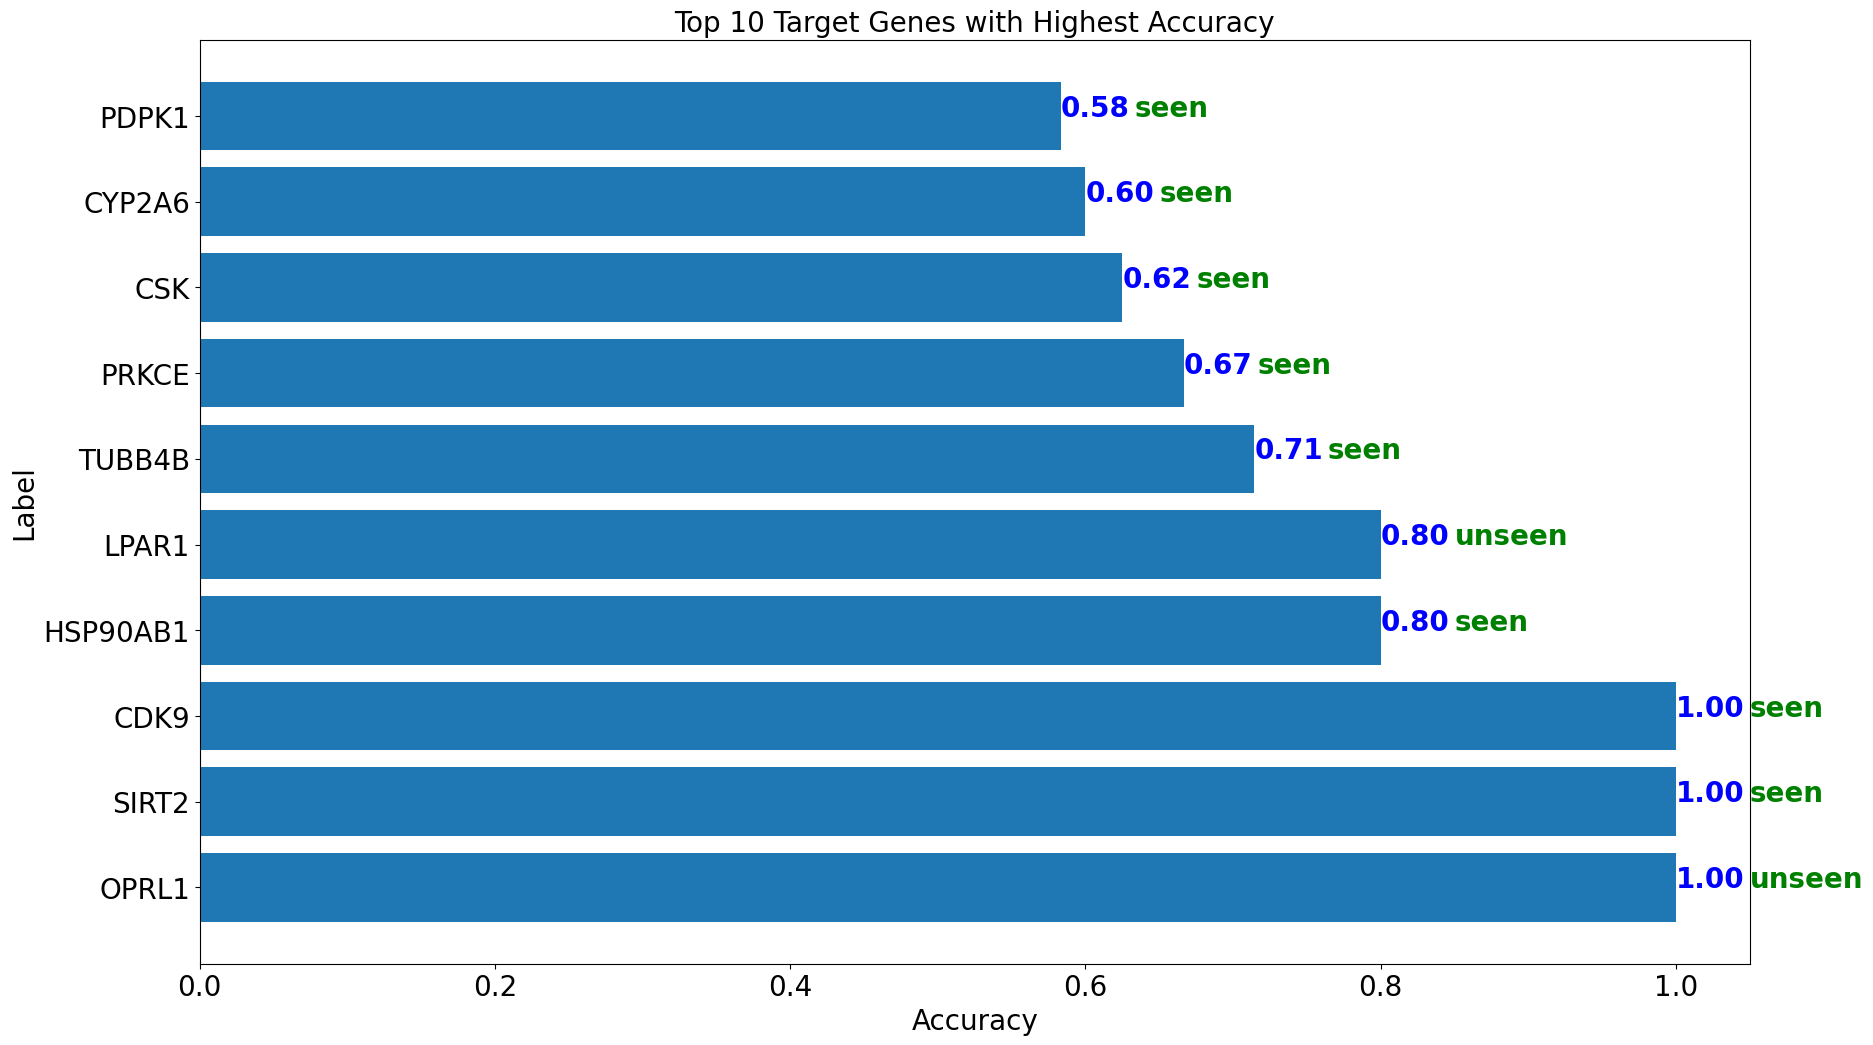

In [26]:
####TOP 10

plt.figure(figsize=(20,12))
plt.barh(df44.index,df44['Precision'])
plt.xlabel('Accuracy',fontsize=20)
plt.ylabel('Label',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Top 10 Target Genes with Highest Accuracy',fontsize=20)
for i,(v,s) in enumerate(zip(df44['Precision'],df44['If_seen'])):
    plt.text(v,i,f'{v:.2f}', color = 'blue', fontweight = 'bold',fontsize=20)
    plt.text(v+0.05, i, s, color = 'green', fontweight = 'bold',fontsize=20)
plt.show()

This is for SLPP

In [114]:
###### SEEN
file_path='total_new.csv' ####
df=pd.read_csv(file_path)
df["Metadata_gene"]=df["Metadata_gene"].fillna('empty')


dfp=df[df['Metadata_control_type']=='negcon']
df=df[df['Metadata_control_type']!='negcon']
df=df[df['Metadata_gene']!='empty']
df=df[df["Metadata_experiment_type"]!='ORF']
# sampling
dd=(df['Metadata_gene'].value_counts())
dd1=dd.index.tolist()

import random
random.seed(1)
aa1=random.sample(dd1, 128)#####

z = []
for m in dd1:
    if m not in aa1:
        z.append(m)
dfcom=df[df['Metadata_experiment_type']=='Compound']
dfcom=dfcom[~dfcom['Metadata_pert_type'].isin(['control'])]

dftr1=dfcom[dfcom['Metadata_gene'].isin(aa1)]

dftr2=df[df['Metadata_experiment_type']=='CRISPR']
dftr2=dftr2[~dftr2['Metadata_pert_type'].isin(['control'])]
lst=['BR00116991','BR00116992','BR00116993','BR00116994','BR00117015','BR00117016','BR00117017','BR00117019','BR00116995','BR00117024','BR00117025','BR00117026','BR00117010','BR00117011','BR00117012','BR00117013']
dc=pd.DataFrame()
for i in lst:
    dc=pd.concat([dc,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
dc0=pd.DataFrame()
for i in ['BR00116991','BR00116992','BR00116993','BR00116994']:
    dc0=pd.concat([dc0,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
    
dc1=pd.DataFrame()
for i in ['BR00117015','BR00117016','BR00117017','BR00117019']:
    dc1=pd.concat([dc1,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
    
dc2=pd.DataFrame()
for i in ['BR00116995','BR00117024','BR00117025','BR00117026']:
    dc2=pd.concat([dc2,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
    
dc3=pd.DataFrame()
for i in ['BR00117010','BR00117011','BR00117012','BR00117013']:
    dc3=pd.concat([dc3,dftr1.loc[dftr1['Metadata_Plate']==i,:]])  
import random
teadd=pd.DataFrame()
for i in aa1:
    dc00=dc0.loc[dc0['Metadata_gene']==i,:]
    dc11=dc1.loc[dc1['Metadata_gene']==i,:]
    dc22=dc2.loc[dc2['Metadata_gene']==i,:]
    dc33=dc3.loc[dc3['Metadata_gene']==i,:]
    if len(dc00['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc00['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc00[dc00['Metadata_pert_iname']==ge]])
    else:
        print('else',len(dc00))
        print(dc00['Metadata_gene'].unique())
        print(dc00['Metadata_pert_iname'].unique())

    if len(dc11['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc11['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc11[dc11['Metadata_pert_iname']==ge]])
    else:
        print('else',len(dc11))
        print(dc11['Metadata_gene'].unique())
        print(dc11['Metadata_pert_iname'].unique())
        
    if len(dc22['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc22['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc22[dc22['Metadata_pert_iname']==ge]])
    else:
        print('else',len(dc22))
        print(dc22['Metadata_gene'].unique())
        print(dc22['Metadata_pert_iname'].unique())
        
    if len(dc33['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc33['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc33[dc33['Metadata_pert_iname']==ge]])
    else:
        print('else',len(dc33))
        print(dc33['Metadata_gene'].unique())
        print(dc33['Metadata_pert_iname'].unique())
        
drolist=list(teadd['Unnamed: 0'].index)
dc1=dc.drop(index=drolist)
dfte1=teadd
dft=pd.concat([dc1,dftr2]) ###训练
dfte2=df[df['Metadata_gene'].isin(z)]
#dfte2=pd.concat([dfte2,dftr2])
dfte2=dfte2[dfte2['Metadata_experiment_type']=='Compound']
dfte2=dfte2.drop_duplicates()
#### SEEN
y_train=dft['Metadata_gene']
trainX=dft.drop('Metadata_gene', axis = 1)
dfte11=dfte1[dfte1['Metadata_gene']!='empty']
y_test=dfte11[dfte11['Metadata_experiment_type']=='Compound']['Metadata_gene']
testX=dfte11[dfte11['Metadata_experiment_type']=='Compound'].drop('Metadata_gene', axis = 1)
trainX=trainX.iloc[:,trainX.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
testX=testX.iloc[:,testX.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
trainX_final=trainX
testX_final=testX
trainY_final=y_train
testY_final=y_test


trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(y_train)
testY=np.array(y_test)

/tmp/ipykernel_2288409/3921620276.py:3: DtypeWarning: Columns (2,6,7,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 8
['PTPN2']
['BVT-948']
else 8
['PTPN2']
['BVT-948']
else 8
['PTPN2']
['BVT-948']
else 8
['PTPN2']
['BVT-948']
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 8
['ANXA1']
['dexamethasone']
else 8
['ANXA1']


In [115]:
n_components=300
sigma=1.0

In [116]:
    # Standardize the data
    X_train = StandardScaler().fit_transform(X_train)
    y_train=trainY
    # Compute the pairwise distance matrix
    D = np.zeros((X_train.shape[0], X_train.shape[0]))
    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[0]):
            D[i, j] = np.linalg.norm(X_train[i] - X_train[j])

    # Compute the adjacency graph using a Gaussian kernel
    W = np.zeros((X_train.shape[0], X_train.shape[0]))
    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[0]):
            W[i, j] = np.exp(-D[i, j] ** 2 / (2 * sigma ** 2)) * (y_train[i] == y_train[j])

    # Compute the degree matrix
    D = np.diag(np.sum(W, axis=1))

    # Compute the Laplacian matrix
    L = D - W

    # Compute the eigenvectors
    eigvals, eigvecs = np.linalg.eig(np.dot(np.dot(X_train.T, L), X_train))

    # Sort the eigenvectors by eigenvalues in descending order
    sort_indices = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, sort_indices]

    # Select the first n_components eigenvectors
    eigvecs = eigvecs[:, :n_components]
    eigvecs=np.real(eigvecs)

In [117]:
transformed_data1 = np.dot(dft.iloc[:,15:], eigvecs)
X2=pd.DataFrame(transformed_data1)
ttX1=dft.iloc[:,:dft.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y")]
ttX1=ttX1.reset_index()
#dfnew=pd.concat([testX1,X2],axis=1)

'''
features = X2
features_norm = features.apply(lambda x: x/np.linalg.norm(x))
features_demean = features_norm - features_norm_mean
'''
dfttt =pd.concat([ttX1,X2],axis=1)
dfttt

,index,Unnamed: 0,Metadata_broad_sample,Metadata_solvent,Metadata_experiment_type,Metadata_Plate,Metadata_Well,Metadata_InChIKey,Metadata_pert_iname,Metadata_pubchem_cid,...,290,291,292,293,294,295,296,297,298,299
0,12674,4,BRD-K48278478-001-01-2,DMSO,Compound,BR00116991,A05,LOUPRKONTZGTKE-AFHBHXEDSA-N,quinine,94175.0,...,14.225062,-19.501594,4.477264,21.522585,14.454718,-2.878993,9.413102,10.003471,4.989960,12.202421
1,12676,6,BRD-K74913225-001-14-0,DMSO,Compound,BR00116991,A07,HCRKCZRJWPKOAR-JTQLQIEISA-N,brinzolamide,68844.0,...,1.151558,-2.992204,1.345386,5.190111,-2.432155,1.781439,3.180925,2.453206,5.893544,3.365079
2,12677,7,BRD-K94342292-001-01-3,DMSO,Compound,BR00116991,A08,MDKAFDIKYQMOMF-UHFFFAOYSA-N,NS-11021,24826000.0,...,1.356766,-4.416943,1.432158,5.171838,-1.893668,2.278982,3.968627,2.874445,6.508482,4.223662
3,12679,9,BRD-K19975102-001-01-2,DMSO,Compound,BR00116991,A10,YYDUWLSETXNJJT-MTJSOVHGSA-N,GNF-5837,59397000.0,...,1.379474,-1.037928,0.280301,-0.068070,-0.941262,0.404889,0.129595,0.062361,-0.446505,0.639731
4,12680,10,BRD-K25244359-066-02-6,DMSO,Compound,BR00116991,A11,WPEWQEMJFLWMLV-UHFFFAOYSA-N,apatinib,11315000.0,...,1.351689,0.311283,-0.913559,0.615240,-0.438514,-0.209384,0.380298,0.282097,-0.284380,-0.024178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6376,18341,379,BRDN0001145303,NaN,CRISPR,BR00118045,P20,NaN,NaN,NaN,...,-1.347412,-0.537208,0.781512,1.189850,0.424619,-0.839260,0.822468,-0.330307,-1.031445,0.909672
6377,18342,380,BRDN0001484228,NaN,CRISPR,BR00118045,P21,NaN,NaN,NaN,...,-1.151377,-0.231866,0.504442,0.314098,1.343304,-0.685955,-0.151871,0.956231,-0.834373,0.247394
6378,18343,381,BRDN0001487618,NaN,CRISPR,BR00118045,P22,NaN,NaN,NaN,...,-1.739929,-0.465154,0.275272,0.613264,0.285168,0.146138,0.678691,0.094518,-0.800536,1.163570
6379,18344,382,BRDN0001487864,NaN,CRISPR,BR00118045,P23,NaN,NaN,NaN,...,-2.070706,-0.557465,1.085501,0.160950,0.704897,0.337016,2.108950,0.079826,0.580309,0.430047


In [118]:
transformed_data = np.dot(testX, eigvecs)
c = dfte1.pop('Metadata_experiment_type')             #pop出一个Series
dfte1.insert(3,'Metadata_experiment_type',c)   #相当于在第4列的位置，添加列名为c_new的列c
X2=pd.DataFrame(transformed_data)
testX1=dfte1.iloc[:,:dfte1.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y")]
testX1=testX1.reset_index()
#dfnew=pd.concat([testX1,X2],axis=1)

'''
features = X2
features_norm = features.apply(lambda x: x/np.linalg.norm(x))
features_demean = features_norm - features_norm_mean
'''
dfnew1 =pd.concat([testX1,X2],axis=1)

In [119]:
y_train=dfttt['Metadata_gene']
trainX=dfttt.drop('Metadata_gene', axis = 1)
trainX=trainX.iloc[:,trainX.columns.get_loc(0):]
from sklearn.neighbors import KNeighborsClassifier
y_test=dfnew1['Metadata_gene']
testX=dfnew1.drop('Metadata_gene', axis = 1)
testX=testX.iloc[:,testX.columns.get_loc(0):]

In [120]:
y_train

0        KCNN4
1         CA5A
2       KCNMA1
3        NTRK1
4          CSK
         ...  
6376      ABL1
6377    GPR119
6378     OPRM1
6379     S1PR1
6380    TGFBR1
Name: Metadata_gene, Length: 6381, dtype: object

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
lst=[]
lst1=[]
knn = KNeighborsClassifier(n_neighbors=1)
trainX.columns = trainX.columns.astype(str)
knn.fit(trainX,y_train)

# make predictions on the test set
y_pred = knn.predict(testX)

# decode the predicted and true labels to get the actual class names

class_names = le.inverse_transform(list(range(len(le.classes_))))

# compute the accuracy, precision, recall, and F1-score for each class

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# print the accuracy score for each class
'''
print('Average Accuracy:',sum(precision)/len(precision))
print('')
for i in range(len(precision)):
    #lst=lst.append(class_names[i])
    #lst1=lst1.append(precision[i])
    print(f"Class {class_names[i]}:")
    print(f"Accuracy score: {precision[i]:.3f}")
    print(f"Recall score: {recall[i]:.3f}")
    print(f"F-1 score: {f1[i]:.3f}")
'''
print('Accuracy:')
print(classification_report(y_test, y_pred))

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy:
              precision    recall  f1-score   support

        ABL1       0.00      0.00      0.00         0
         ADA       0.38      0.50      0.43        16
       ADH1C       0.14      0.06      0.09        16
     ADORA2A       0.00      0.00      0.00        16
      ADRA2B       0.00      0.00      0.00        16
        AGER       0.00      0.00      0.00        15
      AKR1B1       0.00      0.00      0.00        16
      AKR1C1       0.05      0.07      0.05        15
       ALDH2       0.11      0.12      0.11        16
         ALK       0.26      0.38      0.31        16
       ANXA1       0.00      0.00      0.00         0
       ASIC1       0.00      0.00      0.00        16
         ATM       0.02      0.06      0.03        16
     ATP5F1D       0.08      0.06      0.07        16
      AVPR1A       0.18      0.19      0.18        16
         BAX       0.00      0.00      0.00         0
         BTK       0.00      0.00      0.00         0
        CA14     

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [122]:
report5=classification_report(y_test, y_pred,output_dict=True)
df333=pd.DataFrame(report5).transpose()[['precision']]
df333.rename(columns={'precision': 'Precision'},inplace=True)
df333.drop(['micro avg','macro avg','weighted avg'],axis=0,errors='ignore',inplace = True)
df333.index.name='Label'
df333=df333[df333.index.isin(dfte1['Metadata_gene'].unique())]
df333['If_seen']='unseen'

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [123]:
####### UNSEEN
file_path='total_new.csv' ####
df=pd.read_csv(file_path)
df["Metadata_gene"]=df["Metadata_gene"].fillna('empty')


dfp=df[df['Metadata_control_type']=='negcon']
df=df[df['Metadata_control_type']!='negcon']
df=df[df['Metadata_gene']!='empty']
df=df[df["Metadata_experiment_type"]!='ORF']
# sampling
dd=(df['Metadata_gene'].value_counts())
dd1=dd.index.tolist()

import random
random.seed(1)
aa1=random.sample(dd1, 128)#####

z = []
for m in dd1:
    if m not in aa1:
        z.append(m)
dfcom=df[df['Metadata_experiment_type']=='Compound']
dfcom=dfcom[~dfcom['Metadata_pert_type'].isin(['control'])]

dftr1=dfcom[dfcom['Metadata_gene'].isin(aa1)]

dftr2=df[df['Metadata_experiment_type']=='CRISPR']
dftr2=dftr2[~dftr2['Metadata_pert_type'].isin(['control'])]
lst=['BR00116991','BR00116992','BR00116993','BR00116994','BR00117015','BR00117016','BR00117017','BR00117019','BR00116995','BR00117024','BR00117025','BR00117026','BR00117010','BR00117011','BR00117012','BR00117013']
dc=pd.DataFrame()
for i in lst:
    dc=pd.concat([dc,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
dc0=pd.DataFrame()
for i in ['BR00116991','BR00116992','BR00116993','BR00116994']:
    dc0=pd.concat([dc0,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
    
dc1=pd.DataFrame()
for i in ['BR00117015','BR00117016','BR00117017','BR00117019']:
    dc1=pd.concat([dc1,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
    
dc2=pd.DataFrame()
for i in ['BR00116995','BR00117024','BR00117025','BR00117026']:
    dc2=pd.concat([dc2,dftr1.loc[dftr1['Metadata_Plate']==i,:]])
    
dc3=pd.DataFrame()
for i in ['BR00117010','BR00117011','BR00117012','BR00117013']:
    dc3=pd.concat([dc3,dftr1.loc[dftr1['Metadata_Plate']==i,:]])  
import random
teadd=pd.DataFrame()
for i in aa1:
    dc00=dc0.loc[dc0['Metadata_gene']==i,:]
    dc11=dc1.loc[dc1['Metadata_gene']==i,:]
    dc22=dc2.loc[dc2['Metadata_gene']==i,:]
    dc33=dc3.loc[dc3['Metadata_gene']==i,:]
    if len(dc00['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc00['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc00[dc00['Metadata_pert_iname']==ge]])
    else:
        print('else',len(dc00))
        print(dc00['Metadata_gene'].unique())
        print(dc00['Metadata_pert_iname'].unique())

    if len(dc11['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc11['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc11[dc11['Metadata_pert_iname']==ge]])
    else:
        print('else',len(dc11))
        print(dc11['Metadata_gene'].unique())
        print(dc11['Metadata_pert_iname'].unique())
        
    if len(dc22['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc22['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc22[dc22['Metadata_pert_iname']==ge]])
    else:
        print('else',len(dc22))
        print(dc22['Metadata_gene'].unique())
        print(dc22['Metadata_pert_iname'].unique())
        
    if len(dc33['Metadata_pert_iname'].unique())==2:
        ge=random.choice(dc33['Metadata_pert_iname'].unique())
        teadd=pd.concat([teadd,dc33[dc33['Metadata_pert_iname']==ge]])
    else:
        print('else',len(dc33))
        print(dc33['Metadata_gene'].unique())
        print(dc33['Metadata_pert_iname'].unique())
        
drolist=list(teadd['Unnamed: 0'].index)
dc1=dc.drop(index=drolist)
dfte1=teadd
dft=pd.concat([dc1,dftr2]) ###训练
dfte2=df[df['Metadata_gene'].isin(z)]
dfte2=dfte2[dfte2['Metadata_experiment_type']=='Compound']
#dfte2=pd.concat([dfte2,dftr2])
dfte2=dfte2.drop_duplicates()
#### SEEN
y_train=dft['Metadata_gene']
trainX=dft.drop('Metadata_gene', axis = 1)
dfte11=dfte2[dfte2['Metadata_gene']!='empty']
y_test=dfte11[dfte11['Metadata_experiment_type']=='Compound']['Metadata_gene']
testX=dfte11[dfte11['Metadata_experiment_type']=='Compound'].drop('Metadata_gene', axis = 1)
trainX=trainX.iloc[:,trainX.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
testX=testX.iloc[:,testX.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y"):]
trainX_final=trainX
testX_final=testX
trainY_final=y_train
testY_final=y_test


trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(y_train)
testY=np.array(y_test)

/tmp/ipykernel_2288409/2066200632.py:3: DtypeWarning: Columns (2,6,7,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 8
['PTPN2']
['BVT-948']
else 8
['PTPN2']
['BVT-948']
else 8
['PTPN2']
['BVT-948']
else 8
['PTPN2']
['BVT-948']
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 0
[]
[]
else 8
['ANXA1']
['dexamethasone']
else 8
['ANXA1']


In [124]:
trainX=np.array(trainX_final)
testX=np.array(testX_final)
y_train=np.array(trainY_final)
y_test=np.array(testY_final)
X_train = trainX
y_train = y_train
n_components=300
sigma=1.0

In [125]:

    # Standardize the data
    X_train = StandardScaler().fit_transform(X_train)
    # Compute the pairwise distance matrix
    D = np.zeros((X_train.shape[0], X_train.shape[0]))
    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[0]):
            D[i, j] = np.linalg.norm(X_train[i] - X_train[j])

    # Compute the adjacency graph using a Gaussian kernel
    W = np.zeros((X_train.shape[0], X_train.shape[0]))
    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[0]):
            W[i, j] = np.exp(-D[i, j] ** 2 / (2 * sigma ** 2)) * (y_train[i] == y_train[j])

    # Compute the degree matrix
    D = np.diag(np.sum(W, axis=1))

    # Compute the Laplacian matrix
    L = D - W

    # Compute the eigenvectors
    eigvals, eigvecs = np.linalg.eig(np.dot(np.dot(X_train.T, L), X_train))

    # Sort the eigenvectors by eigenvalues in descending order
    sort_indices = np.argsort(eigvals)[::-1]
    eigvecs = eigvecs[:, sort_indices]

    # Select the first n_components eigenvectors
    eigvecs = eigvecs[:, :n_components]
    eigvecs=np.real(eigvecs)

In [126]:
transformed_data11 = np.dot(dft.iloc[:,15:], eigvecs)
X2=pd.DataFrame(transformed_data11)
ttX1=dft.iloc[:,:dft.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y")]
ttX1=ttX1.reset_index()
#dfnew=pd.concat([testX1,X2],axis=1)

'''
features = X2
features_norm = features.apply(lambda x: x/np.linalg.norm(x))
features_demean = features_norm - features_norm_mean
'''
dfttt =pd.concat([ttX1,X2],axis=1)
dfttt

,index,Unnamed: 0,Metadata_broad_sample,Metadata_solvent,Metadata_experiment_type,Metadata_Plate,Metadata_Well,Metadata_InChIKey,Metadata_pert_iname,Metadata_pubchem_cid,...,290,291,292,293,294,295,296,297,298,299
0,12674,4,BRD-K48278478-001-01-2,DMSO,Compound,BR00116991,A05,LOUPRKONTZGTKE-AFHBHXEDSA-N,quinine,94175.0,...,14.440410,-20.621535,-6.186848,21.428882,-13.768617,-3.171128,-8.465376,-11.083806,5.479511,13.949678
1,12676,6,BRD-K74913225-001-14-0,DMSO,Compound,BR00116991,A07,HCRKCZRJWPKOAR-JTQLQIEISA-N,brinzolamide,68844.0,...,1.226439,-2.956875,-1.602464,5.220073,2.528694,1.645733,-2.861502,-2.715075,5.973549,3.547608
2,12677,7,BRD-K94342292-001-01-3,DMSO,Compound,BR00116991,A08,MDKAFDIKYQMOMF-UHFFFAOYSA-N,NS-11021,24826000.0,...,1.474121,-4.423878,-1.736677,5.209963,1.967729,2.127357,-3.626638,-3.198621,6.645688,4.430409
3,12679,9,BRD-K19975102-001-01-2,DMSO,Compound,BR00116991,A10,YYDUWLSETXNJJT-MTJSOVHGSA-N,GNF-5837,59397000.0,...,1.412409,-1.109456,-0.315734,-0.065221,0.930200,0.390491,-0.111788,-0.042206,-0.424219,0.436228
4,12680,10,BRD-K25244359-066-02-6,DMSO,Compound,BR00116991,A11,WPEWQEMJFLWMLV-UHFFFAOYSA-N,apatinib,11315000.0,...,1.338213,0.191213,0.857555,0.675725,0.454778,-0.203274,-0.347392,-0.360387,-0.263079,-0.172328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6376,18341,379,BRDN0001145303,NaN,CRISPR,BR00118045,P20,NaN,NaN,NaN,...,-1.327996,-0.375310,-0.654806,1.092318,-0.465208,-0.836380,-0.938255,0.287515,-0.991861,0.847866
6377,18342,380,BRDN0001484228,NaN,CRISPR,BR00118045,P21,NaN,NaN,NaN,...,-1.134673,-0.104076,-0.411719,0.245082,-1.370825,-0.667759,0.064087,-0.905993,-1.034073,0.262891
6378,18343,381,BRDN0001487618,NaN,CRISPR,BR00118045,P22,NaN,NaN,NaN,...,-1.709499,-0.310141,-0.152801,0.556908,-0.331192,0.118870,-0.758077,-0.091067,-0.853418,1.396384
6379,18344,382,BRDN0001487864,NaN,CRISPR,BR00118045,P23,NaN,NaN,NaN,...,-2.013939,-0.347968,-0.875679,0.055815,-0.863727,0.300525,-2.211011,-0.087342,0.591182,0.200835


In [127]:
transformed_data = np.dot(testX, eigvecs)
c = dfte2.pop('Metadata_experiment_type')             #pop出一个Series
dfte2.insert(3,'Metadata_experiment_type',c)   #相当于在第4列的位置，添加列名为c_new的列c
X2=pd.DataFrame(transformed_data)
testX2=dfte2.iloc[:,:dfte2.columns.get_loc("Cells_AreaShape_BoundingBoxMaximum_Y")]
testX2=testX2.reset_index()
#dfnew=pd.concat([testX1,X2],axis=1)

'''
features = X2
features_norm = features.apply(lambda x: x/np.linalg.norm(x))
features_demean = features_norm - features_norm_mean
'''
dfnew2 =pd.concat([testX2,X2],axis=1)

In [128]:
y_train=dfttt['Metadata_gene']
trainX=dfttt.drop('Metadata_gene', axis = 1)
trainX=trainX.iloc[:,trainX.columns.get_loc(0):]
from sklearn.neighbors import KNeighborsClassifier
y_test=dfnew2['Metadata_gene']
testX=dfnew2.drop('Metadata_gene', axis = 1)
testX=testX.iloc[:,testX.columns.get_loc(0):]

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
lst=[]
lst1=[]
knn = KNeighborsClassifier(n_neighbors=1)
trainX.columns = trainX.columns.astype(str)
knn.fit(trainX,y_train)

# make predictions on the test set
y_pred = knn.predict(testX)

# decode the predicted and true labels to get the actual class names

class_names = le.inverse_transform(list(range(len(le.classes_))))

# compute the accuracy, precision, recall, and F1-score for each class

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred)

# print the accuracy score for each class
'''
print('Average Accuracy:',sum(precision)/len(precision))
print('')
for i in range(len(precision)):
    #lst=lst.append(class_names[i])
    #lst1=lst1.append(precision[i])
    print(f"Class {class_names[i]}:")
    print(f"Accuracy score: {precision[i]:.3f}")
    print(f"Recall score: {recall[i]:.3f}")
    print(f"F-1 score: {f1[i]:.3f}")
'''
print('Accuracy')
print(classification_report(y_test, y_pred))

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy
              precision    recall  f1-score   support

        ABL1       0.00      0.00      0.00        48
         ADA       0.00      0.00      0.00         0
       ADH1C       0.00      0.00      0.00         0
     ADORA2A       0.00      0.00      0.00         0
      ADRA2B       0.00      0.00      0.00         0
        AGER       0.00      0.00      0.00         0
      AKR1B1       0.00      0.00      0.00         0
      AKR1C1       0.00      0.00      0.00         0
        AKT1       0.00      0.00      0.00        47
       ALDH2       0.00      0.00      0.00         0
         ALK       0.00      0.00      0.00         0
       ANXA1       0.00      0.00      0.00         0
       ASIC1       0.00      0.00      0.00         0
         ATM       0.00      0.00      0.00         0
     ATP5F1D       0.00      0.00      0.00         0
       AURKB       0.00      0.00      0.00        48
      AVPR1A       0.00      0.00      0.00         0
         BAX      

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [130]:
report6=classification_report(y_test, y_pred,output_dict=True)
df444=pd.DataFrame(report6).transpose()[['precision']]
df444.rename(columns={'precision': 'Precision'},inplace=True)
df444.drop(['micro avg','macro avg','weighted avg'],axis=0,errors='ignore',inplace = True)
df444.index.name='Label'
df444=df444[df444.index.isin(dfte2['Metadata_gene'].unique())]
df444['If_seen']='unseen'

/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yuchen.yang@insilico.ai/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

In [131]:
df555=pd.concat([df333,df444])
df555=df555.dropna()
print('AVG_Seen_ACC',df333['Precision'].mean())
print('AVG_Unseen_ACC',df444['Precision'].mean())
print('AVG_TOTAL_ACC',df555['Precision'].mean())
df555=df555.sort_values(by='Precision', ascending = False)
df555=df555.iloc[:10,:]

AVG_Seen_ACC 0.12738994189119468
AVG_Unseen_ACC 0.049479166666666664
AVG_TOTAL_ACC 0.10850248123070302


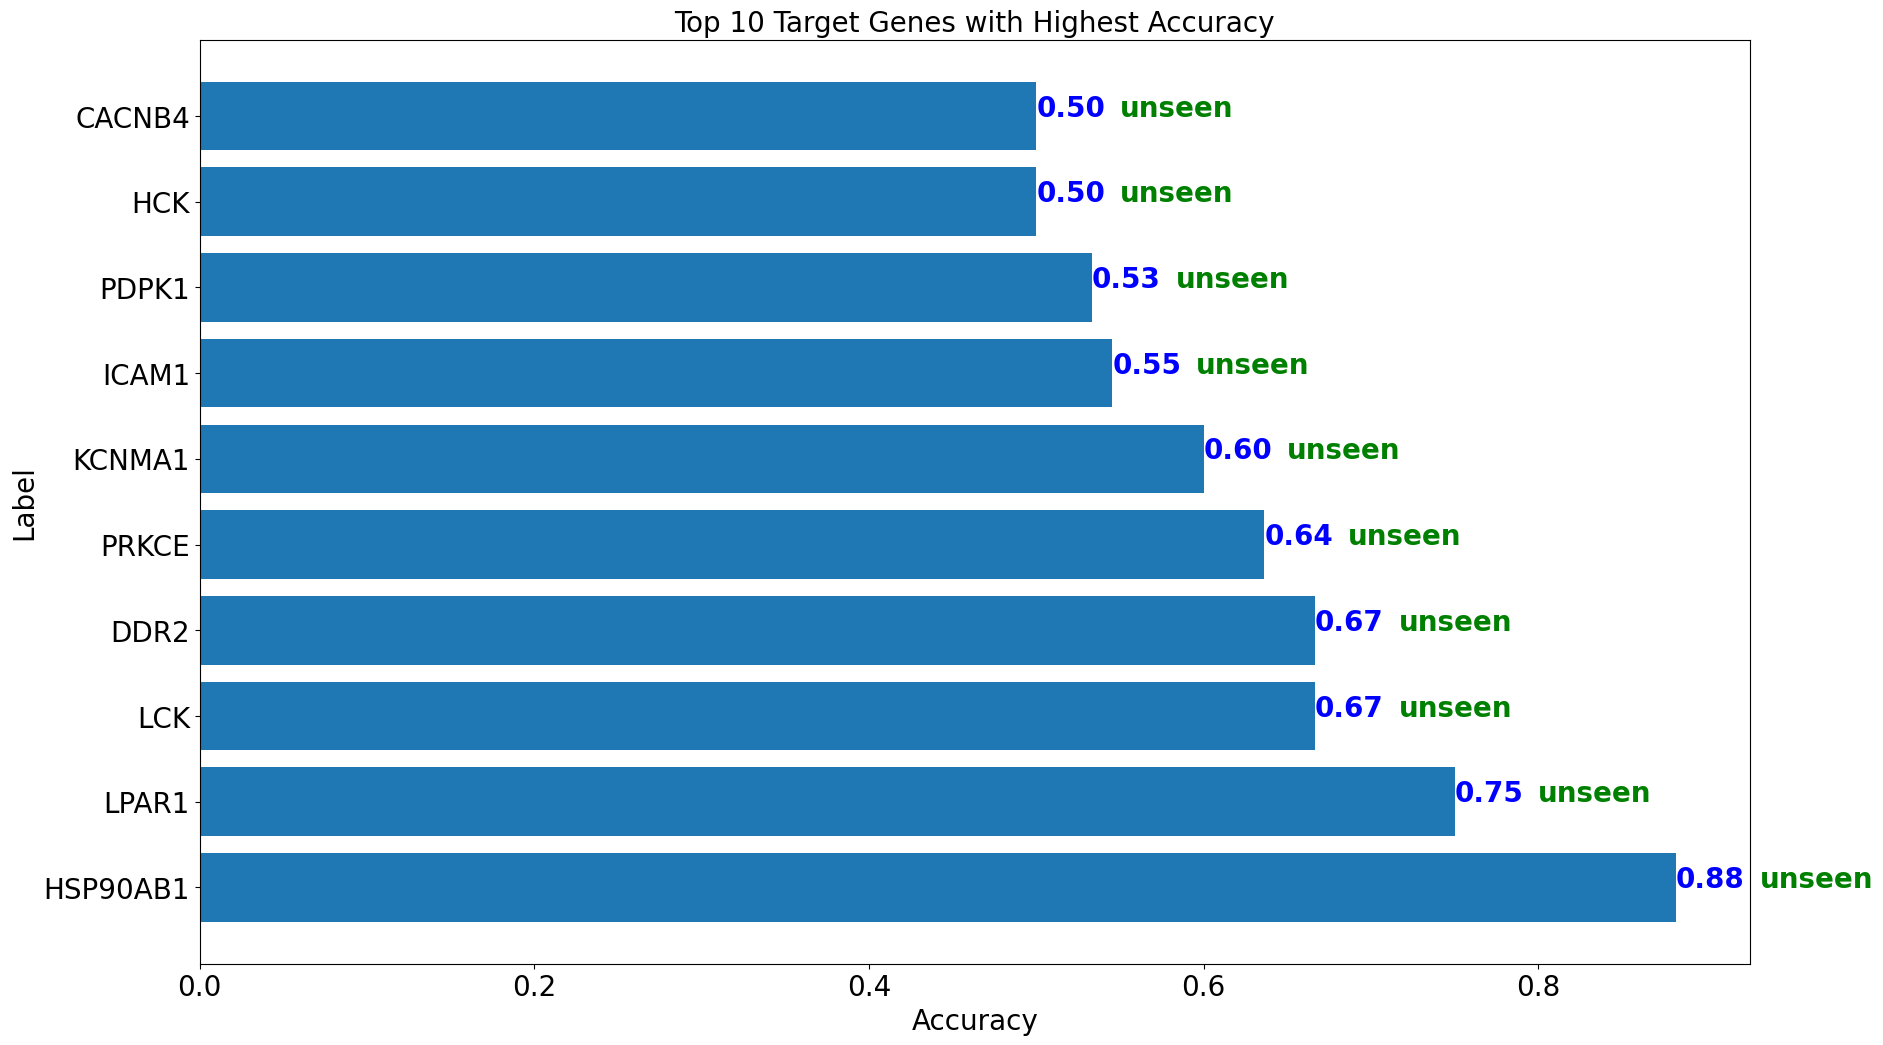

In [132]:
plt.figure(figsize=(20,12))
plt.barh(df555.index,df555['Precision'])
plt.xlabel('Accuracy',fontsize=20)
plt.ylabel('Label',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title('Top 10 Target Genes with Highest Accuracy',fontsize=20)
for i,(v,s) in enumerate(zip(df555['Precision'],df555['If_seen'])):
    plt.text(v,i,f'{v:.2f}', color = 'blue', fontweight = 'bold',fontsize=20)
    plt.text(v+0.05, i, s, color = 'green', fontweight = 'bold',fontsize=20)
plt.show()